In [2]:
!pip3 install pandas matplotlib scipy


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip


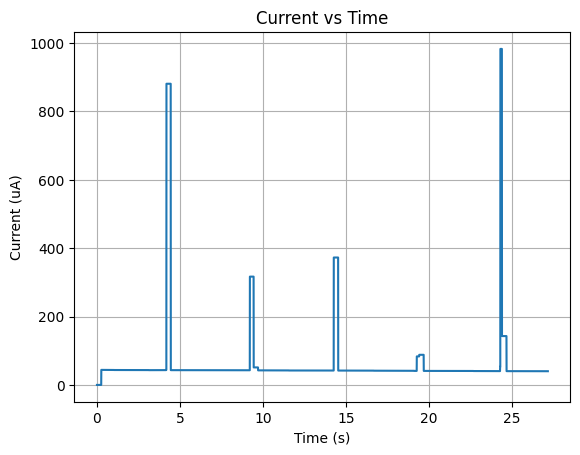

Total integral of current pulses: 1641.9845121091244 nA.ns


In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import trapz

# Read the CSV file
data = pd.read_csv('/Users/personal/Desktop/EnergyTrace_2023_05_23_205145_SIN_LDO.csv')

# Extract the 'Time (ns)' and 'Current (nA)' columns
time = data['Time (ns)']
current = data['Current (nA)']

# Sum a specific value to all entries in the 'Current (nA)' column
value_to_add = 0.018
#value_to_add = 0
current = (current + value_to_add)/(1000)

time = time/(1000000000)

# Plot current against time
plt.plot(time, current)
plt.xlabel('Time (s)')
plt.ylabel('Current (uA)')
plt.title('Current vs Time')
plt.grid(True)
plt.show()

# Numerical integration of the current pulses
total_integral = trapz(current, time)

print("Total integral of current pulses:", total_integral, "nA.ns")


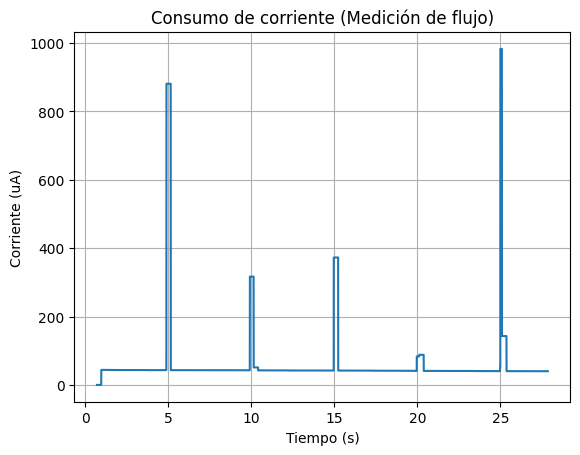

Integral of pulse 1 : 230.27913340710768 mA.ms
Integral of pulse 2 : 484.94606256622393 mA.ms
Integral of pulse 3 : 99.64049736384794 mA.ms
Integral of pulse 4 : 421.8542615810751 mA.ms
Integral of pulse 5 : 94.83981283986158 mA.ms


In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import trapz

# Read the CSV file
data = pd.read_csv('/Users/personal/Desktop/EnergyTrace_2023_05_23_205145_SIN_LDO.csv')

# Extract the 'Time (ns)' and 'Current (nA)' columns
time = data['Time (ns)']
current = data['Current (nA)']

# Sum a specific value to all entries in the 'Current (nA)' column
value_to_add = 0.018
current = (current + value_to_add)/(1000)

time = time/(1000000000) + 0.7

# Plot current against time
plt.plot(time, current)
plt.xlabel('Tiempo (s)')
plt.ylabel('Corriente (uA)')
plt.title('Consumo de corriente (Medición de flujo)')
plt.grid(True)
plt.show()

# Find the indices where the pulses start and end
pulse_indices = []
threshold = 300  # Adjust the threshold as per your data
for i in range(1, len(current)-1):
    if abs(current[i] - current[i-1]) > threshold:# and abs(current[i] - current[i+1]) > threshold:
        pulse_indices.append(i)

# Calculate the integral for each pulse
pulse_integrals = []
for i in range(len(pulse_indices)-1):
    start_idx = pulse_indices[i]
    end_idx = pulse_indices[i+1]
    pulse_integral = trapz(current[start_idx:end_idx+1], time[start_idx:end_idx+1])
    pulse_integrals.append(pulse_integral)

# Print the integral for each pulse
for i, integral in enumerate(pulse_integrals):
    print("Integral of pulse", i+1, ":", integral, "mA.ms")


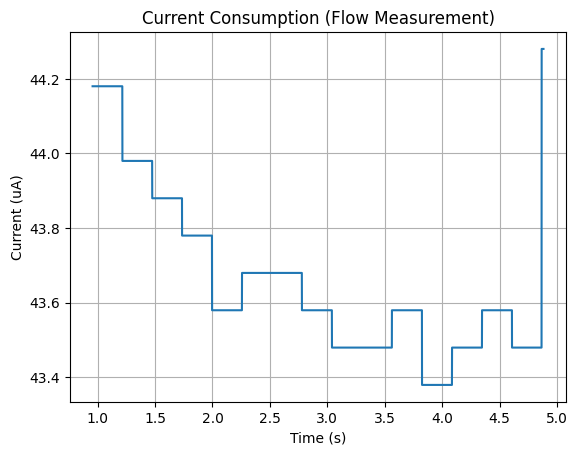

In [151]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import trapz

# Read the CSV file
data = pd.read_csv('/Users/personal/Desktop/LPM3.csv')

# Extract the 'Time (ns)' and 'Current (nA)' columns
time = data['Time (ns)']
current = data['Current (nA)']

# Sum a specific value to all entries in the 'Current (nA)' column
value_to_add = 180
current = (current + value_to_add) / 1000

time = time / 1000000000 + 0.7

# Plot current against time
plt.plot(time, current)
plt.xlabel('Time (s)')
plt.ylabel('Current (uA)')
plt.title('Current Consumption (Flow Measurement)')
plt.grid(True)
plt.show()


import pandas as pd

# Lee el archivo CSV
df = pd.read_csv('/Users/personal/Desktop/LPM3.csv')

# Extrae las columnas relevantes
df = df[['Time (ns)', 'Current (nA)']]

# Convierte las columnas a tipo numérico
df['Time (ns)'] = pd.to_numeric(df['Time (ns)'])
df['Current (nA)'] = pd.to_numeric(df['Current (nA)'])
df['Current (nA)'] = df['Current (nA)'] + 180
# Encuentra los índices donde ocurren los pulsos de corriente
threshold = 60000  # Umbral para detectar el inicio del pulso de corriente
end_threshold = 55000  # Umbral para detectar el final del pulso de corriente
pulses_indices = []
current_pulse = False

for i, row in df.iterrows():
    if row['Current (nA)'] > threshold:
        if not current_pulse:
            # Inicio de un nuevo pulso
            start = i
            #pulses_indices.append(i)
            current_pulse = True
            print(current_pulse)
    elif current_pulse and row['Current (nA)'] < end_threshold:
        end = i
        # Fin del pulso actual
        current_pulse = False
        print(start,end)
        pulses_indices.append([start,end])

# Calcula la integral de corriente, el ancho del pulso y el promedio de corriente para cada pulso
results = []
for i in range(len(pulses_indices)):
    start = pulses_indices[i][0]
    end = pulses_indices[i][1]
    pulse = df.iloc[start:end]
    avg_current = pulse['Current (nA)'].mean()
    pulse_duration = pulse['Time (ns)'].max() - pulse['Time (ns)'].min()
    integral = avg_current * pulse_duration / 1000000000
    results.append((pulse_duration, integral, avg_current))

# Imprime los resultados
for i, (pulse_duration, integral, avg_current) in enumerate(results):
    start_time = df.loc[pulses_indices[i][0], 'Time (ns)']
    print(f"Pulso {i+1} - Tiempo de inicio: {start_time} ns - Ancho del pulso: {pulse_duration/1000000} ms - Integral: {integral} uJ - Promedio de corriente: {avg_current/1000} uA")


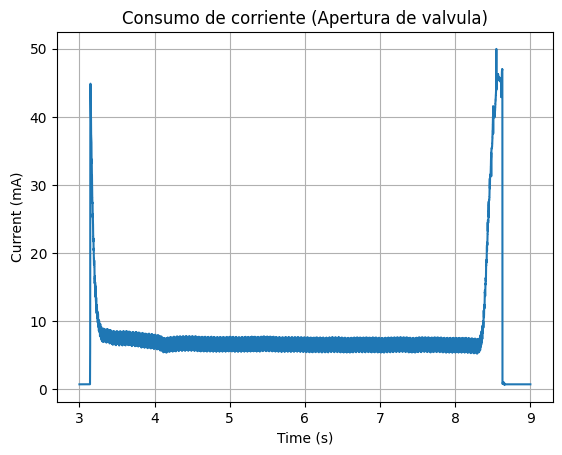

True
568 22512
Pulso 1 - Tiempo de inicio: 3.142 ns - Ancho del pulso: 5.485750000000002e-06 ms - Integral: 4.485275836559502e-11 uJ - Promedio de corriente: 8.176230846392016e-06 uA


In [146]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import trapz

# Read the CSV file
data = pd.read_csv('/Users/personal/Desktop/Valvula_abriendo_3v3/Main current - Arc.csv')

# Extract the 'Time (ns)' and 'Current (nA)' columns
time = data['Timestamp']
current = data['Value']

# Sum a specific value to all entries in the 'Current (nA)' column
value_to_add = 0.000018 + 0.0007
current = (current + value_to_add) * 1000

time = time 

# Plot current against time
plt.plot(time, current)
plt.xlabel('Time (s)')
plt.ylabel('Current (mA)')
plt.title('Consumo de corriente (Apertura de valvula)')
plt.grid(True)
plt.show()


import pandas as pd

# Lee el archivo CSV
df = pd.read_csv('/Users/personal/Desktop/Valvula_abriendo_3v3/Main current - Arc.csv')

# Extrae las columnas relevantes
df = df[['Timestamp', 'Value']] 

# Convierte las columnas a tipo numérico
df['Timestamp'] = pd.to_numeric(df['Timestamp'])
df['Value'] = pd.to_numeric(df['Value'])
df['Value'] = df['Value'] + 0.000718 
# Encuentra los índices donde ocurren los pulsos de corriente
threshold = 0.004  # Umbral para detectar el inicio del pulso de corriente
end_threshold = 0.004 # Umbral para detectar el final del pulso de corriente
pulses_indices = []
current_pulse = False

for i, row in df.iterrows():
    if row['Value'] > threshold:
        if not current_pulse:
            # Inicio de un nuevo pulso
            start = i
            #pulses_indices.append(i)
            current_pulse = True
            print(current_pulse)
    elif current_pulse and row['Value'] < end_threshold:
        end = i
        # Fin del pulso actual
        current_pulse = False
        print(start,end)
        pulses_indices.append([start,end])

# Calcula la integral de corriente, el ancho del pulso y el promedio de corriente para cada pulso
results = []
for i in range(len(pulses_indices)):
    start = pulses_indices[i][0]
    end = pulses_indices[i][1]
    pulse = df.iloc[start:end]
    avg_current = pulse['Value'].mean()
    pulse_duration = pulse['Timestamp'].max() - pulse['Timestamp'].min()
    integral = avg_current * pulse_duration / 1000000000
    results.append((pulse_duration, integral, avg_current))

# Imprime los resultados
for i, (pulse_duration, integral, avg_current) in enumerate(results):
    start_time = df.loc[pulses_indices[i][0], 'Timestamp']
    print(f"Pulso {i+1} - Tiempo de inicio: {start_time} ns - Ancho del pulso: {pulse_duration/1000000} ms - Integral: {integral} uJ - Promedio de corriente: {avg_current/1000} uA")


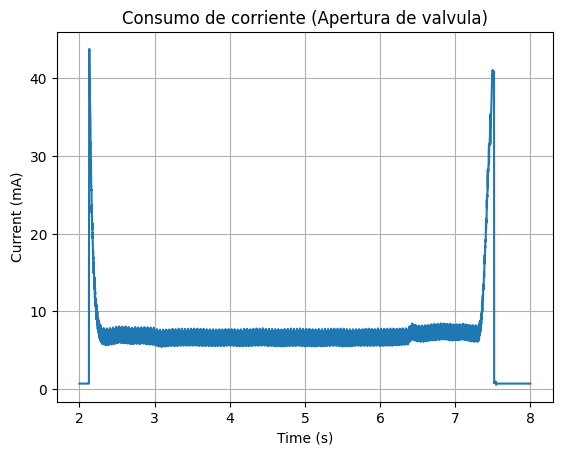

True
504 22072
Pulso 1 - Tiempo de inicio: 2.126 ns - Ancho del pulso: 5.39175e-06 ms - Integral: 4.0991817832780264e-11 uJ - Promedio de corriente: 7.602692601248252e-06 uA


In [147]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import trapz

# Read the CSV file
data = pd.read_csv('/Users/personal/Desktop/Valvula_cerrando_3v3/Main current - Arc.csv')

# Extract the 'Time (ns)' and 'Current (nA)' columns
time = data['Timestamp']
current = data['Value']

# Sum a specific value to all entries in the 'Current (nA)' column
value_to_add = 0.000018 + 0.0007
current = (current + value_to_add) * 1000

time = time 

# Plot current against time
plt.plot(time, current)
plt.xlabel('Time (s)')
plt.ylabel('Current (mA)')
plt.title('Consumo de corriente (Apertura de valvula)')
plt.grid(True)
plt.show()


import pandas as pd

# Lee el archivo CSV
df = pd.read_csv('/Users/personal/Desktop/Valvula_cerrando_3v3/Main current - Arc.csv')

# Extrae las columnas relevantes
df = df[['Timestamp', 'Value']] 

# Convierte las columnas a tipo numérico
df['Timestamp'] = pd.to_numeric(df['Timestamp'])
df['Value'] = pd.to_numeric(df['Value'])
df['Value'] = df['Value'] + 0.000718 
# Encuentra los índices donde ocurren los pulsos de corriente
threshold = 0.004  # Umbral para detectar el inicio del pulso de corriente
end_threshold = 0.004 # Umbral para detectar el final del pulso de corriente
pulses_indices = []
current_pulse = False

for i, row in df.iterrows():
    if row['Value'] > threshold:
        if not current_pulse:
            # Inicio de un nuevo pulso
            start = i
            #pulses_indices.append(i)
            current_pulse = True
            print(current_pulse)
    elif current_pulse and row['Value'] < end_threshold:
        end = i
        # Fin del pulso actual
        current_pulse = False
        print(start,end)
        pulses_indices.append([start,end])

# Calcula la integral de corriente, el ancho del pulso y el promedio de corriente para cada pulso
results = []
for i in range(len(pulses_indices)):
    start = pulses_indices[i][0]
    end = pulses_indices[i][1]
    pulse = df.iloc[start:end]
    avg_current = pulse['Value'].mean()
    pulse_duration = pulse['Timestamp'].max() - pulse['Timestamp'].min()
    integral = avg_current * pulse_duration / 1000000000
    results.append((pulse_duration, integral, avg_current))

# Imprime los resultados
for i, (pulse_duration, integral, avg_current) in enumerate(results):
    start_time = df.loc[pulses_indices[i][0], 'Timestamp']
    print(f"Pulso {i+1} - Tiempo de inicio: {start_time} ns - Ancho del pulso: {pulse_duration/1000000} ms - Integral: {integral} uJ - Promedio de corriente: {avg_current/1000} uA")


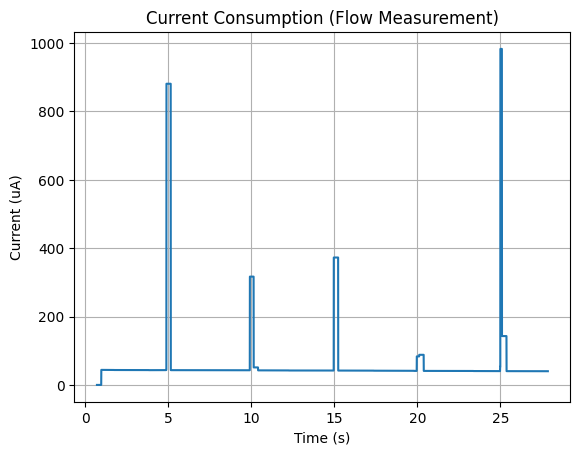

True
16662 17776
True
36832 38810
True
57048 58118
True
77051 78730
True
97131 98682
Pulso 1 - Tiempo de inicio: 4164159000 ns - Ancho del pulso: 278.296 ms - Integral: 230961.8974333932 uJ - Promedio de corriente: 829.9145421903052 uA
Pulso 2 - Tiempo de inicio: 9206456000 ns - Ancho del pulso: 494.186 ms - Integral: 86417.8910835187 uJ - Promedio de corriente: 174.86916076845299 uA
Pulso 3 - Tiempo de inicio: 14260280000 ns - Ancho del pulso: 267.237 ms - Integral: 99599.2299 uJ - Promedio de corriente: 372.7 uA
Pulso 4 - Tiempo de inicio: 19260806000 ns - Ancho del pulso: 419.319 ms - Integral: 36247.118143240026 uJ - Promedio de corriente: 86.44282310899344 uA
Pulso 5 - Tiempo de inicio: 24280526000 ns - Ancho del pulso: 387.492 ms - Integral: 134968.41030638298 uJ - Promedio de corriente: 348.3127659574468 uA


In [116]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import trapz

# Read the CSV file
data = pd.read_csv('/Users/personal/Desktop/EnergyTrace_2023_05_23_205145_SIN_LDO.csv')

# Extract the 'Time (ns)' and 'Current (nA)' columns
time = data['Time (ns)']
current = data['Current (nA)']

# Sum a specific value to all entries in the 'Current (nA)' column
value_to_add = 0.018
current = (current + value_to_add) / 1000

time = time / 1000000000 + 0.7

# Plot current against time
plt.plot(time, current)
plt.xlabel('Time (s)')
plt.ylabel('Current (uA)')
plt.title('Current Consumption (Flow Measurement)')
plt.grid(True)
plt.show()


import pandas as pd

# Lee el archivo CSV
df = pd.read_csv('/Users/personal/Desktop/EnergyTrace_2023_05_23_205145_SIN_LDO.csv')


import pandas as pd

# Lee el archivo CSV
df = pd.read_csv('/Users/personal/Desktop/EnergyTrace_2023_05_23_205145_SIN_LDO.csv')

# Extrae las columnas relevantes
df = df[['Time (ns)', 'Current (nA)']]

# Convierte las columnas a tipo numérico
df['Time (ns)'] = pd.to_numeric(df['Time (ns)'])
df['Current (nA)'] = pd.to_numeric(df['Current (nA)'])

# Encuentra los índices donde ocurren los pulsos de corriente
threshold = 44000  # Umbral para detectar el inicio del pulso de corriente
end_threshold = 50000  # Umbral para detectar el final del pulso de corriente
pulses_indices = []
current_pulse = False

for i, row in df.iterrows():
    if row['Current (nA)'] > threshold:
        if not current_pulse:
            # Inicio de un nuevo pulso
            start = i
            #pulses_indices.append(i)
            current_pulse = True
            print(current_pulse)
    elif current_pulse and row['Current (nA)'] < end_threshold:
        end = i
        # Fin del pulso actual
        current_pulse = False
        print(start,end)
        pulses_indices.append([start,end])

# Calcula la integral de corriente, el ancho del pulso y el promedio de corriente para cada pulso
results = []
for i in range(len(pulses_indices)):
    start = pulses_indices[i][0]
    end = pulses_indices[i][1]
    pulse = df.iloc[start:end]
    avg_current = pulse['Current (nA)'].mean()
    pulse_duration = pulse['Time (ns)'].max() - pulse['Time (ns)'].min()
    integral = avg_current * pulse_duration / 1000000000
    results.append((pulse_duration, integral, avg_current))

# Imprime los resultados
for i, (pulse_duration, integral, avg_current) in enumerate(results):
    start_time = df.loc[pulses_indices[i][0], 'Time (ns)']
    print(f"Pulso {i+1} - Tiempo de inicio: {start_time} ns - Ancho del pulso: {pulse_duration/1000000} ms - Integral: {integral} uJ - Promedio de corriente: {avg_current/1000} uA")


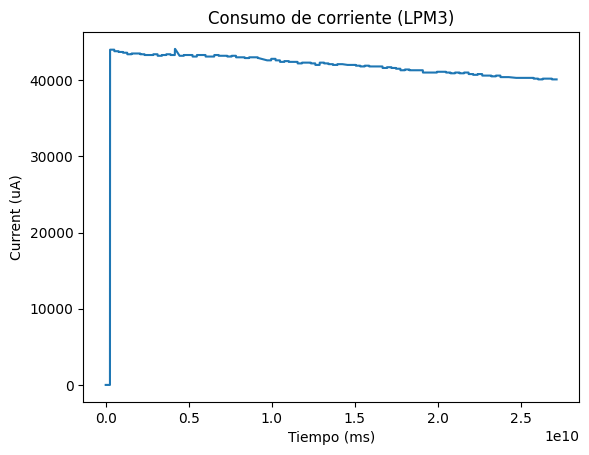

In [161]:
import pandas as pd
import matplotlib.pyplot as plt

# Lee el archivo CSV
data = pd.read_csv('/Users/personal/Desktop/EnergyTrace_2023_05_23_205145_SIN_LDO.csv')

# Filtra las filas donde la segunda columna "Current" es menor o igual a 60000
data = data[data['Current (nA)'] <= 50000]
# Reacomoda la columna de tiempo para eliminar espacios vacíos
data['Time (ns)'] = pd.to_numeric(data['Time (ns)'])
data['Time (ns)'] = data['Time (ns)'] - data['Time (ns)'].min()
data['Current (nA)'] = data['Current (nA)']*1000

# Grafica current en función del tiempo
plt.plot(data['Time (ns)'], data['Current (nA)'])
plt.xlabel('Tiempo (ms)')
plt.ylabel('Current (uA)')
plt.title('Consumo de corriente (LPM3)')
plt.show()
